In [1]:
import pandas as pd
import xarray as xr
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR

/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


In [2]:
import seaborn as sns

In [3]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

hallo


# Code + figures

In [4]:
output_name = 'fig_em_based_ERF_GSAT'

### Path input data

In [5]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR, BASE_DIR

#PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
PATH_DATASET = OUTPUT_DATA_DIR/'historic_delta_GSAT/dT_data_hist_recommendation.nc'

fn_ERF_2019= OUTPUT_DATA_DIR/'historic_delta_GSAT/2019_ERF_est.csv'
#fn_output_decomposition = OUTPUT_DATA_DIR / 'historic_delta_GSAT/hist_ERF_est_decomp.csv'

fn_ERF_timeseries = OUTPUT_DATA_DIR/'historic_delta_GSAT/hist_ERF_est.csv'

fp_collins_sd = RESULTS_DIR/'tables_historic_attribution/table_std_smb_orignames.csv'

fn_TAB2_THORNHILL = INPUT_DATA_DIR/'table2_thornhill2020.csv'

### Path output data

In [6]:
PATH_DF_OUTPUT = OUTPUT_DATA_DIR / 'historic_delta_GSAT/dT_data_hist_recommendation.csv'

print(PATH_DF_OUTPUT)

/Users/sarablichner/science/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/historic_delta_GSAT/dT_data_hist_recommendation.csv


### various definitions

**Set reference year for temperature change:**

In [7]:

ref_period = [1850,1900]
pd_period = [2010,2019]

In [8]:
# variables to plot:
variables_erf_comp = [
    'CO2', 'N2O', 'CH4', 'HC', 'NOx', 'SO2', 'BC', 'OC', 'NH3','VOC'
]
# total ERFs for anthropogenic and total:
variables_erf_tot = []
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = []

In [9]:
varn = ['co2','N2O','HC','HFCs','ch4','o3','H2O_strat','ari','aci']
var_dir = ['CO2','N2O','HC','HFCs','CH4_lifetime','O3','Strat_H2O','Aerosol','Cloud']

In [10]:
rename_dic_cat = {
    'CO2':'Carbon dioxide (CO$_2$)',
    'GHG':'WMGHG',
    'CH4_lifetime': 'Methane (CH$_4$)',
    'O3': 'Ozone (O$_3$)',
    'Strat_H2O':'H$_2$O (strat)',
    'Aerosol':'Aerosol-radiation',
    'Cloud':'Aerosol-cloud',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',
    'HFCs':'HFC'

}
rename_dic_cols ={
    'co2':'CO$_2$',
    'CO2':'CO$_2$',
    'CH4':'CH$_4$',
    'ch4':'CH$_4$',
    'N2O':'N$_2$O',
    'n2o':'N$_2$O',
    'HC':'CFC + HCFC + HFC',
    'HFCs':'HFC',
    'NOx':'NO$_x$',
    'VOC':'NMVOC + CO',
    'SO2':'SO$_2$',
    'OC':'Organic carbon',
    'BC':'Black carbon',
    'NH3':'Ammonia'
}

### Open ERF dataset:

In [11]:
ds = xr.open_dataset(PATH_DATASET)
ds#['Delta T']

<xarray.Dataset>
Dimensions:     (percentile: 1, variable: 10, year: 270)
Coordinates:
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2016 2017 2018 2019
  * variable    (variable) object 'CO2' 'N2O' 'CH4' 'NOx' ... 'NH3' 'VOC' 'HC'
  * percentile  (percentile) object 'recommendation'
Data variables:
    ERF         (variable, year) float64 ...
    time        (year) datetime64[ns] ...
    delta_t     (year) float64 ...
    Delta T     (percentile, variable, year) float64 ...

### Overview plots

In [12]:
cols = get_cmap_dic(ds['variable'].values)

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.26666666666666666, 0.0, 0.5254901960784314)
(0.3764705882352941, 0.5725490196078431, 0.796078431372549)
(0.5411764705882353, 0.2235294117647059, 0.0)
(0.4745098039215686, 0.792156862745098, 0.9333333333333333)
(0.0, 0.6901960784313725, 0.6039215686274509)
(0.0, 0.5019607843137255, 0.23137254901960785)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)


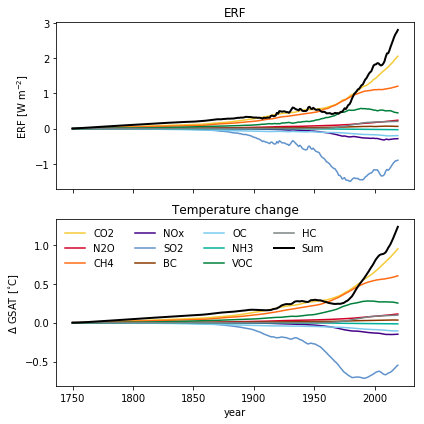

In [13]:
fig, axs = plt.subplots(2, sharex=True, figsize=[6,6])

ax_erf = axs[0]
ax_dT = axs[1]
for v in ds['variable'].values:
    ds.sel(variable=v)['Delta T'].plot(ax=ax_dT, label=v, c=cols[v])
    ds.sel(variable=v)['ERF'].plot(ax=ax_erf, c=cols[v])
ds.sum('variable')['Delta T'].plot(ax=ax_dT, label='Sum', c='k',linewidth=2)
ds.sum('variable')['ERF'].plot(ax=ax_erf, c='k',linewidth=2)
    
ax_dT.set_title('Temperature change')
ax_erf.set_title('ERF')
ax_erf.set_ylabel('ERF [W m$^{-2}$]')
ax_dT.set_ylabel('$\Delta$ GSAT [$^{\circ}$C]')
ax_erf.set_xlabel('')
ax_dT.legend(ncol=4, loc='upper left', frameon=False)
plt.tight_layout()
fig.savefig('hist_timeseries_ERF_dT.png', dpi=300)

In [14]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']

In [15]:
col_list = [cols[c] for c in df_deltaT.columns]

In [16]:
import seaborn as sns

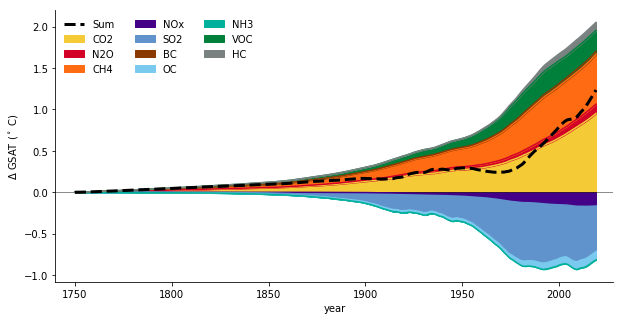

In [17]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']

fig, ax = plt.subplots(figsize=[10,5])
ax.hlines(0,1740,2028, linestyle='solid',alpha=0.9, color='k', linewidth=0.5)#.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3)

df_deltaT.plot.area( color=col_list, ax=ax)
df_deltaT.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3, label='Sum')
plt.legend(loc='upper left',ncol=3, frameon=False)
plt.ylabel('$\Delta$ GSAT ($^\circ$ C)')
ax.set_xlim([1740,2028])
sns.despine()

In [18]:
import seaborn as sns

# Split up ERF/warming into sources by using data from Thornhill

We use the original split up in ERF from Thornhill/Bill Collin's plot 

Open dataset from Bill Collin's script:

In [19]:
from ar6_ch6_rcmipfigs.constants import BASE_DIR, OUTPUT_DATA_DIR
# file path table of ERF 2019-1750



In [20]:
import pandas as pd

In [21]:
df_collins = pd.read_csv(fn_ERF_2019, index_col=0)
df_collins.index = df_collins.index.rename('emission_experiment')
df_collins_sd = pd.read_csv(fp_collins_sd, index_col=0)
df_collins

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O,HFCs
emission_experiment,,,,,,,,,
CO2,2.057554,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000
CH4,0.017549,0.844457,0.05,-0.003448,0.018421,0.279179,0.00,0.00,0.000000
N2O,0.000000,-0.035967,0.00,-0.002717,0.042503,0.024311,0.00,0.21,0.000000
HC,0.000053,-0.050927,0.00,-0.010501,-0.017419,-0.164586,0.41,0.00,0.039772
NOx,0.000000,-0.380025,0.00,-0.011912,-0.014458,0.120237,0.00,0.00,0.000000
VOC,0.069491,0.162462,0.00,-0.003344,0.008884,0.210860,0.00,0.00,0.000000
SO2,0.000000,0.000000,0.00,-0.214702,-0.683985,0.000000,0.00,0.00,0.000000
OC,0.000000,0.000000,0.00,-0.066129,-0.133067,0.000000,0.00,0.00,0.000000
BC,0.000000,0.000000,0.00,0.123707,-0.060878,0.000000,0.00,0.00,0.000000


In [22]:
width = 0.7
kwargs = {'linewidth':.1,'edgecolor':'k'}

## decompose GSAT as ERF 

### Source of delta T equal to source of ERF

In [23]:
df_collins

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O,HFCs
emission_experiment,,,,,,,,,
CO2,2.057554,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000
CH4,0.017549,0.844457,0.05,-0.003448,0.018421,0.279179,0.00,0.00,0.000000
N2O,0.000000,-0.035967,0.00,-0.002717,0.042503,0.024311,0.00,0.21,0.000000
HC,0.000053,-0.050927,0.00,-0.010501,-0.017419,-0.164586,0.41,0.00,0.039772
NOx,0.000000,-0.380025,0.00,-0.011912,-0.014458,0.120237,0.00,0.00,0.000000
VOC,0.069491,0.162462,0.00,-0.003344,0.008884,0.210860,0.00,0.00,0.000000
SO2,0.000000,0.000000,0.00,-0.214702,-0.683985,0.000000,0.00,0.00,0.000000
OC,0.000000,0.000000,0.00,-0.066129,-0.133067,0.000000,0.00,0.00,0.000000
BC,0.000000,0.000000,0.00,0.123707,-0.060878,0.000000,0.00,0.00,0.000000


#### GSAT

In [24]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']
mean_PD = df_deltaT.loc[pd_period[0]:pd_period[1]].mean()
mean_PD

mean_PI = df_deltaT.loc[ref_period[0]:ref_period[1]].mean()


In [25]:
dT_period_diff = pd.DataFrame(mean_PD-mean_PI, columns=['diff'])#df_deltaT.loc[2019])
dT_period_diff.index= dT_period_diff.index.rename('emission_experiment')

Make normalized distribution of ERF to components

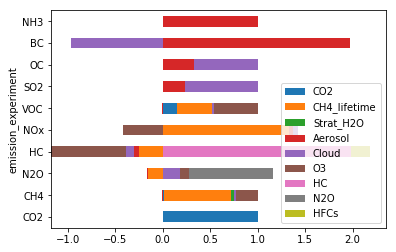

In [26]:
df_coll_t = df_collins.transpose()
if 'Total' in df_coll_t.index:
    df_coll_t = df_coll_t.drop('Total')
# scale by total:
scale = df_coll_t.sum()
# normalized ERF: 
df_col_normalized = df_coll_t/scale
#
df_col_normalized.transpose().plot.barh(stacked=True)

We multiply the change in GSAT in 2019 by the matrix describing the source distribution from the ERF:

In [27]:
df_dt_sep = dT_period_diff['diff'] * df_col_normalized
df_dt_sep=df_dt_sep.transpose()

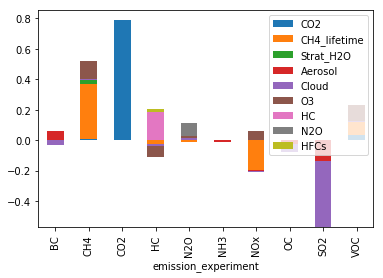

In [28]:
df_dt_sep.plot.bar(stacked=True)

#### Double check that the sum is the same as before:

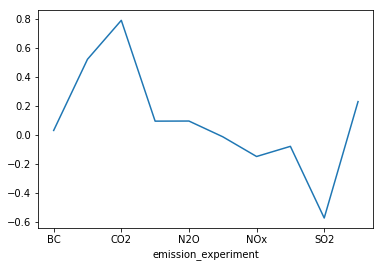

In [29]:
df_dt_sep.transpose().sum().plot.line()
plt.show()

### ERF

In [30]:
df_ERF = ds['ERF'].squeeze().to_dataframe().unstack('variable')['ERF']
mean_ERF_PD = df_ERF.loc[pd_period[0]:pd_period[1]].mean()

mean_ERF_PI = df_ERF.loc[ref_period[0]:ref_period[1]].mean()

In [31]:
df_ERF['CO2'].loc[2019]

2.0575541755746745

In [32]:
df_ERF['CO2'].loc[pd_period[0]:pd_period[1]].mean()-df_ERF['CO2'].loc[ref_period[0]:ref_period[1]].mean()



1.7031441207959122

In [33]:
df_ERF['CO2'].loc[ref_period[0]:ref_period[1]].mean()


0.18206349863541488

In [34]:
ERF_period_diff = pd.DataFrame(mean_ERF_PD-mean_ERF_PI, columns=['diff'])#df_deltaT.loc[2019])
ERF_period_diff.index= ERF_period_diff.index.rename('emission_experiment')

We multiply the change in GSAT in 2019 by the matrix describing the source distribution from the ERF:

In [35]:
df_erf_sep = ERF_period_diff['diff'] * df_col_normalized
df_erf_sep=df_erf_sep.transpose()

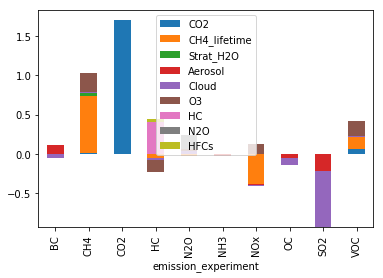

In [36]:
df_erf_sep.plot.bar(stacked=True)

## Accounting for non-linearities in ERFaci, we scale down the ERF aci contribution to fit with chapter 7 

In [37]:
scal_to = -0.38
aci_tot = df_dt_sep.sum()['Cloud']
scale_by = scal_to/aci_tot
print(scal_to, aci_tot)

df_dt_sep['Cloud'] = df_dt_sep['Cloud']*scale_by
df_dt_sep.sum()

-0.38 -0.5039798256063833


CO2             0.831302
CH4_lifetime    0.211464
Strat_H2O       0.021566
Aerosol        -0.132294
Cloud          -0.380000
O3              0.225202
HC              0.187229
N2O             0.083775
HFCs            0.018162
dtype: float64

## Uncertainties

In [38]:
import pandas as pd
num_mod_lab = 'Number of models (Thornhill 2020)'
thornhill = pd.read_csv(fn_TAB2_THORNHILL, index_col=0)
thornhill.index = thornhill.index.rename('Species')
thornhill

std_2_95th = 1.645

sd_tot = df_collins_sd['Total_sd']
df_err= pd.DataFrame(sd_tot.rename('std'))
df_err['SE'] = df_err

df_err['SE'] = df_err['std']/np.sqrt(thornhill[num_mod_lab])
df_err['95-50_SE'] = df_err['SE']*std_2_95th
df_err.loc['CO2','95-50_SE']= df_err.loc['CO2','std']
df_err

df_err['95-50'] = df_err['std']*std_2_95th
df_err.loc['CO2','95-50']= df_err.loc['CO2','std']
df_err

,std,SE,95-50_SE,95-50
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.182717,0.064600,0.106267,0.300569
N2O,0.061899,0.027682,0.045537,0.101825
HC,0.117053,0.047787,0.078609,0.192552
NOx,0.173085,0.077406,0.127333,0.284725
VOC,0.137949,0.061693,0.101484,0.226926
SO2,0.401442,0.163888,0.269596,0.660372
OC,0.134342,0.054845,0.090220,0.220992
BC,0.213043,0.080523,0.132460,0.350455


#### Uncertainty on period mean ERF is scaled by uncertainty in 2019: 


### CONTINUE HERE!!!

In [41]:
ERF_2019_tot = df_collins.mean(axis=1).reindex(df_err.index)
ERF_period_diff_tot = df_erf_sep.mean(axis=1).reindex(df_err.index)

In [42]:
df_err#.reindex(ERF_2019_tot.)

,std,SE,95-50_SE,95-50
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.182717,0.064600,0.106267,0.300569
N2O,0.061899,0.027682,0.045537,0.101825
HC,0.117053,0.047787,0.078609,0.192552
NOx,0.173085,0.077406,0.127333,0.284725
VOC,0.137949,0.061693,0.101484,0.226926
SO2,0.401442,0.163888,0.269596,0.660372
OC,0.134342,0.054845,0.090220,0.220992
BC,0.213043,0.080523,0.132460,0.350455


Scale by the period mean to the original 1750-2019 difference. 

In [50]:
df_err['95-50_period'] = df_err['95-50']*np.abs(ERF_period_diff_tot/ERF_2019_tot)

In [44]:
df_err

,std,SE,95-50_SE,95-50,95-50_period
Species,,,,,
CO2,0.246907,NaN,0.246907,0.246907,0.204377
CH4,0.182717,0.064600,0.106267,0.300569,0.256183
N2O,0.061899,0.027682,0.045537,0.101825,0.085736
HC,0.117053,0.047787,0.078609,0.192552,0.187043
NOx,0.173085,0.077406,0.127333,0.284725,0.292864
VOC,0.137949,0.061693,0.101484,0.226926,0.207663
SO2,0.401442,0.163888,0.269596,0.660372,0.689449
OC,0.134342,0.054845,0.090220,0.220992,0.165985
BC,0.213043,0.080523,0.132460,0.350455,0.317190


## Uncertainties $\Delta$ GSAT


\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

most of the uncertainty in the IRF derives from the uncertainty in the climate sensitivity which is said 3 (2.5-4), i.e. relative std 0.5/3 for the lower and 1/3 for the higher. If we treat this as two independent normally distributed variables multiplied together, $X$ and $Y$ and $X \cdot Y$, we may propagate the uncertainty: 

\begin{align*} 
\frac{\sigma_{XY}^2}{(XY)^2} = \Big[(\frac{\sigma_X}{X})^2 + (\frac{\sigma_Y}{Y})^2 \Big]
\end{align*}

In [51]:
std_ERF =df_err['std']
std_ECS_lw_rl = 0.5/3
std_ECS_hg_rl = 1/3

tot_ERF = ERF_2019_tot.reindex(std_ERF.index)#tab_plt_ERF.sum(axis=1)
std_erf_rl = np.abs(std_ERF/tot_ERF)
std_erf_rl

Species
CO2     1.080000
CH4     1.363380
N2O     2.339462
HC      5.104240
NOx     5.443743
VOC     2.769110
SO2     4.020280
OC      6.069779
BC     30.517833
NH3     1.285714
dtype: float64

In [52]:
def rel_sigma_prod(rel_sigmaX,rel_sigmaY):
    var_prod_rel =( (rel_sigmaX)**2 + (rel_sigmaY)**2)
    rel_sigma_prod = np.sqrt(var_prod_rel)
    return rel_sigma_prod

rel_sig_lw =  rel_sigma_prod(std_erf_rl, std_ECS_lw_rl)
rel_sig_hg =  rel_sigma_prod(std_erf_rl, std_ECS_hg_rl)

In [53]:
tot_dT = df_dt_sep.sum(axis=1).reindex(std_ERF.index)

neg_v =(tot_dT<0)#.squeeze()

In [54]:
std_2_95th

1.645

In [56]:
err_dT = pd.DataFrame(index=tot_dT.index)
err_dT['min 1 sigma'] = np.abs(tot_dT*rel_sig_lw)#*tot_dT
err_dT['plus 1 sigma'] =np.abs(tot_dT*rel_sig_hg)
err_dT['plus 1 sigma'][neg_v]=np.abs(tot_dT*rel_sig_lw)[neg_v]#.iloc[neg_v].iloc[neg_v].iloc[neg_v]
err_dT['min 1 sigma'][neg_v]=np.abs(tot_dT*rel_sig_hg)[neg_v]#.iloc[neg_v].iloc[neg_v].iloc[neg_v]
#err_dT['min 1 sigma'].iloc[neg_v] =np.abs(tot_dT*rel_sig_hg).iloc[neg_v]
#err_dT['plus 1 sigma'][neg_v] = np.abs(tot_dT*rel_sig_lw)[neg_v]
#err_dT['min 1 sigma'][neg_v] = np.abs(tot_dT*rel_sig_hg)[neg_v]
#[::-1]
err_dT['p50-05'] = err_dT['min 1 sigma']*std_2_95th
err_dT['p95-50'] = err_dT['plus 1 sigma']*std_2_95th
err_dT

#var_nn_dir = [rename_dic_cols[v] for v in varn]

,min 1 sigma,plus 1 sigma,p50-05,p95-50
Species,,,,
CO2,0.861391,0.890940,1.416989,1.465596
CH4,0.711891,0.727443,1.171060,1.196644
N2O,0.213021,0.214628,0.350419,0.353063
HC,0.491325,0.492109,0.808229,0.809519
NOx,0.803273,0.802147,1.321384,1.319531
VOC,0.631491,0.634901,1.038802,1.044411
SO2,1.877434,1.872621,3.088379,3.080462
OC,0.402244,0.401791,0.661692,0.660945
BC,1.139840,1.139891,1.875038,1.875121


In [125]:
df_err = df_err.rename(rename_dic_cols, axis=0)

### Reorder and rename

In [126]:
exps_ls = ['CO2', 'CH4', 'N2O', 'HC', 'NOx', 'VOC', 'SO2', 'OC', 'BC', 'NH3']

In [127]:
tab_plt_dT = df_dt_sep.loc[::-1,var_dir]#.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt_dT = tab_plt_dT.loc[exps_ls]
tab_plt_dT = tab_plt_dT.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)

In [128]:
tab_plt_erf = df_erf_sep.loc[::-1,var_dir]#.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt_erf = tab_plt_erf.loc[exps_ls]
tab_plt_erf = tab_plt_erf.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)

In [129]:
cmap = get_cmap_dic(var_dir)
col_ls = [cmap[c] for c in cmap.keys()]

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


In [130]:
tab_plt_dT.sum(axis=1)

emission_experiment
CO$_2$              0.788254
CH$_4$              0.518293
N$_2$O              0.090825
CFC + HCFC + HFC    0.096207
NO$_x$             -0.147283
NMVOC + CO          0.227636
SO$_2$             -0.465394
Organic carbon     -0.066170
Black carbon        0.037349
Ammonia            -0.013313
dtype: float64

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [ ]:
sns.set_style()
fig, axs = plt.subplots(1,2,dpi=300, figsize=[10,4])#, dpi=150)
width=.8
kws = {
    'width':.8,
    'linewidth':.1,
    'edgecolor':'k',
    
}

ax=axs[0]
ax.axvline(x=0., color='k', linewidth=0.25)

tab_plt_ERF.plot.barh(stacked=True, color=col_ls, ax=ax,**kws)
#tot = table['Total'][::-1]
tot = tab_plt_ERF.sum(axis=1)#tab_plt
xerr = df_err['95-50'][::-1]
y = np.arange(len(tot))
ax.errorbar(tot, y,xerr=xerr,marker='d', linestyle='None', color='k', label='Sum', )
#ax.legend(frameon=False)
ax.set_ylabel('')


for lab, y in zip(tab_plt.index, ybar):
        #plt.text(-1.55, ybar[i], species[i],  ha='left')#, va='left')
    ax.text(-1.9, y-0.1, lab,  ha='left')#, va='left')
ax.set_title('Effective radiative forcing, 1750 to 2019')
ax.set_xlabel(r'(W m$^{-2}$)')
#ax.set_xlim(-1.5, 2.6)
    #plt.xlim(-1.6, 2.0)
#sns.despine(fig, left=True, trim=True)
ax.legend(loc='lower right', frameon=False)
ax.set_yticks([])

ax.get_legend().remove()

ax.set_xticks(np.arange(-1.5,2.1,.5))
ax.set_xticks(np.arange(-1.5,2,.1), minor=True)




ax=axs[1]
ax.axvline(x=0., color='k', linewidth=0.25)

tab_plt_dT[::-1].plot.barh(stacked=True, color=col_ls, ax=ax,**kws)
tot = tab_plt_dT.sum(axis=1)[::-1]
#xerr =0# df_err['95-50'][::-1]
y = np.arange(len(tot))

ax.errorbar(tot, y,
            xerr=err_dT[['p50-05','p95-50']].loc[tot.index].transpose().values,
            #xerr=err_dT[['min 1 sigma','plus 1 sigma']].loc[tot.index].transpose().values,
            marker='d', linestyle='None', color='k', label='Sum', )
#ax.legend(frameon=False)
ax.set_ylabel('')

ax.set_title('Change in GSAT, 1850-1900 to 2010-2019')
ax.set_xlabel(r'($^{\circ}$C)')
ax.set_xlim(-1.3, 1.8)


sns.despine(fig, left=True, trim=True)
ax.spines['bottom'].set_bounds(-1.,1.5)
ax.legend(loc='lower right', frameon=False)


ax.set_xticks(np.arange(-1,2.1,.5))
    #ax.xaxis.set_major_locator(MultipleLocator(.5))
    
ax.set_xticks(np.arange(-1,1.6,.5))
ax.set_xticks(np.arange(-1,1.5,.1), minor=True)


fn = output_name + '.png'
fp = RESULTS_DIR /'figures_historic_attribution_DT'/fn
fp.parent.mkdir(parents=True, exist_ok=True)
ax.set_yticks([])
fig.tight_layout()
plt.savefig(fp, dpi=300, bbox_inches='tight')
plt.savefig(fp.with_suffix('.pdf'), dpi=300, bbox_inches='tight')
plt.savefig(fp.with_suffix('.png'), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
tab_plt_ERF.sum(axis=0)

In [ ]:
tab_plt_dT.sum(axis=1)

In [ ]:
tab_plt_dT.sum()

### Write vales to csv

In [ ]:
fn = output_name+'_values_ERF.csv'
fp = RESULTS_DIR /'figures_historic_attribution_DT'/fn
tab_plt_ERF.to_csv(fp)


fn = output_name+'_values_ERF_uncertainty.csv'
fp = RESULTS_DIR /'figures_historic_attribution_DT'/fn
df_err.to_csv(fp)

In [ ]:
fn = output_name+'_values_dT.csv'
fp = RESULTS_DIR /'figures_historic_attribution_DT'/fn
tab_plt_dT.to_csv(fp)


fn = output_name+'_values_dT_uncertainty.csv'
fp = RESULTS_DIR /'figures_historic_attribution_DT'/fn
err_dT.to_csv(fp)